In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv('../../data/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Hagamos una exploración y preprocesamiento de los datos en función de obtener variables relevantes para entrenar un modelo de regresión logística que indique la probabilidad de que un usuario cancele (churn) su servicio.

Empezamos por ver la cantidad de datos faltantes por columna y el tipo de la columna.

In [4]:
nans_dtypes = pd.DataFrame({'Missing Values': df_data.isnull().sum(), 'Data Types': df_data.dtypes, "unique_values": df_data.nunique()})
nans_dtypes

,Missing Values,Data Types,unique_values
customerID,0,object,7043
gender,0,object,2
SeniorCitizen,0,int64,2
Partner,0,object,2
Dependents,0,object,2
tenure,0,int64,73
PhoneService,0,object,2
MultipleLines,0,object,3
InternetService,0,object,3
OnlineSecurity,0,object,3


In [5]:
df_data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df_data["SeniorCitizen"].unique()

array([0, 1])

In [7]:
df_data["customerID"].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [8]:
df_data["Churn"].unique()

array(['No', 'Yes'], dtype=object)

1. Nótese que TotalCharges está siendo leída como un object en lugar de un tipo numérico. Es necesario hacer la columna.
2. Nótese que SeniorCitizen está siendo leída como numérica cuando es una variable categórica binaria. Es necesario transformar la columna.
2. Por otro lado, customerID es un mero identificador del registro. Como no aporta información, se descarta.
3. Por último, Churn es un string. Lo pasaremos a entero para poder usarlo como target del modelo.

In [9]:
#Hacemos una copia para no alterar el df original
df_data_processed = df_data.copy()

In [10]:
df_data_processed['TotalCharges'] = pd.to_numeric(df_data_processed['TotalCharges'], errors='coerce')
df_data_processed["SeniorCitizen"] = df_data_processed["SeniorCitizen"].astype("object")
#aquí al hacer dropna nos estamos llevando los posibles nan en total charges resultantes de la conversión a numérico con coerce.
df_data_processed = df_data_processed.drop(columns=["customerID"]).dropna()
df_data_processed["Churn"] = df_data_processed["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [11]:
df_data_processed.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df_data_processed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


Muchas de nuestras variables son categóricas. Es necesario aplicar un encoder para obtener variables numéricas con las que entrenar nuestro modelo.

In [13]:
nans_dtypes_df_processed = pd.DataFrame({'Missing Values': df_data_processed.isnull().sum(), 'Data Types': df_data_processed.dtypes, "unique_values": df_data_processed.nunique()})
nans_dtypes_df_processed

,Missing Values,Data Types,unique_values
gender,0,object,2
SeniorCitizen,0,object,2
Partner,0,object,2
Dependents,0,object,2
tenure,0,int64,72
PhoneService,0,object,2
MultipleLines,0,object,3
InternetService,0,object,3
OnlineSecurity,0,object,3
OnlineBackup,0,object,3


Nótese, además, que varias de las categóricas son binarias. ¿Si me quedo solo con una, pierdo alguna información relevante?

Entrenemos el model de clasificación logística solo con variables categóricas binarias, sin descatar ninguna luego de hacer encode y luego, descartando uno de los encode.
Si el score no sufre cambios significativos es porque al quedarme con una no estoy perdiendo información valiosa.

In [14]:
binary_variables = nans_dtypes_df_processed[nans_dtypes_df_processed["unique_values"] == 2].iloc[:-1, :]
binary_variables.index.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling']

In [15]:
binary_encoded_complete = pd.get_dummies(
    df_data_processed[binary_variables.index.to_list()]
).astype("int64")

In [16]:
binary_encoded_only_one = pd.get_dummies(
    df_data_processed[binary_variables.index.to_list()],
    drop_first=True
).astype("int64")

In [17]:
binary_encoded_complete

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,1,0,1,0,0,1,1,0,1,0,0,1
1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,1,0,1,0,1,0,0,1,0,1
3,0,1,1,0,1,0,1,0,1,0,1,0
4,1,0,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,1,0,1
7039,1,0,1,0,0,1,0,1,0,1,0,1
7040,1,0,1,0,0,1,0,1,1,0,0,1
7041,0,1,0,1,0,1,1,0,0,1,0,1


In [19]:
binary_encoded_only_one

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0,0,1,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,1
3,1,0,0,0,0,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
7038,1,0,1,1,1,1
7039,0,0,1,1,1,1
7040,0,0,1,1,0,1
7041,1,1,1,0,1,1


<Axes: >

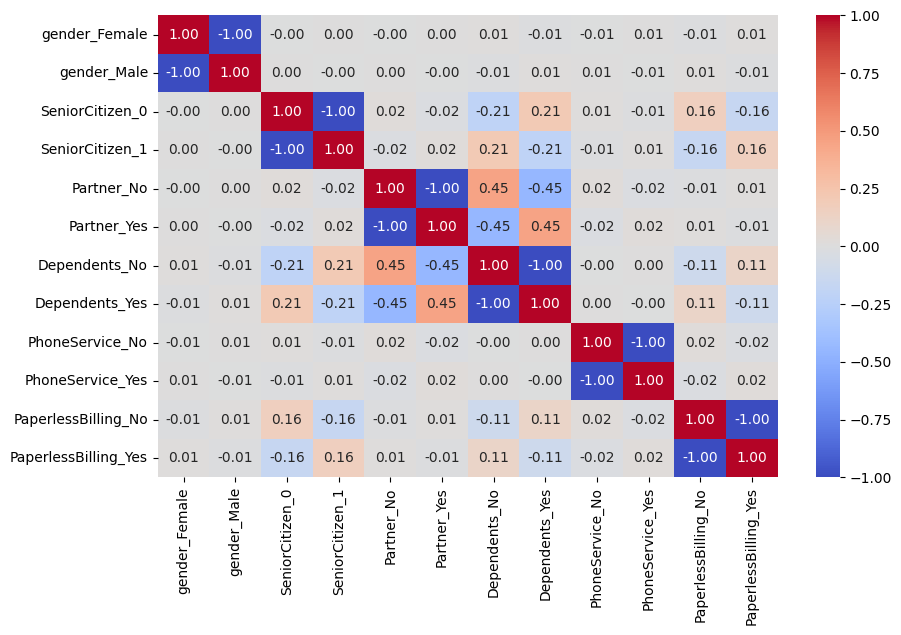

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_encoded_complete.corr(), annot=True, fmt=".2f", cmap='coolwarm')

In [25]:
X_complete, y_complete = binary_encoded_complete, df_data_processed["Churn"]
X_only_one, y_only_one = binary_encoded_only_one, df_data_processed["Churn"]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [29]:
train_model(X_complete, y_complete), train_model(X_only_one, y_only_one)/train_model(X_complete, y_complete)

(0.7334754797441365, 1.0)

Respecto a la pregunta, se confirma la intuición de que no perdemos información si se descarta una de las variables encoded. Solo válido para variables categóricas BINARIAS.

Una demostración de que esto se cumple en general puede basarse en que la variable "sí" es simplemente el inverso aditivo de la variable "no". Esto no es más que un caso particular de multicolinelidad. Una variable puede entenderse como una combinación lineal de las otras (o de la otra en este caso).

Las ventajas claras de descartar una de las variables, es la reducción de la dimensionalidad del dataframe y cómo esto puede influir positivamente en los tiempos de entrenamiento y ejecución de los modelos.

In [43]:
encoded_df = pd.get_dummies(
    df_data_processed,
    drop_first=True,
    dtype=int
)

In [45]:
encoded_df

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,0,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,7362.90,0,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,346.45,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,306.60,1,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### Búsqueda de correlaciones y posibles combinaciones lineales

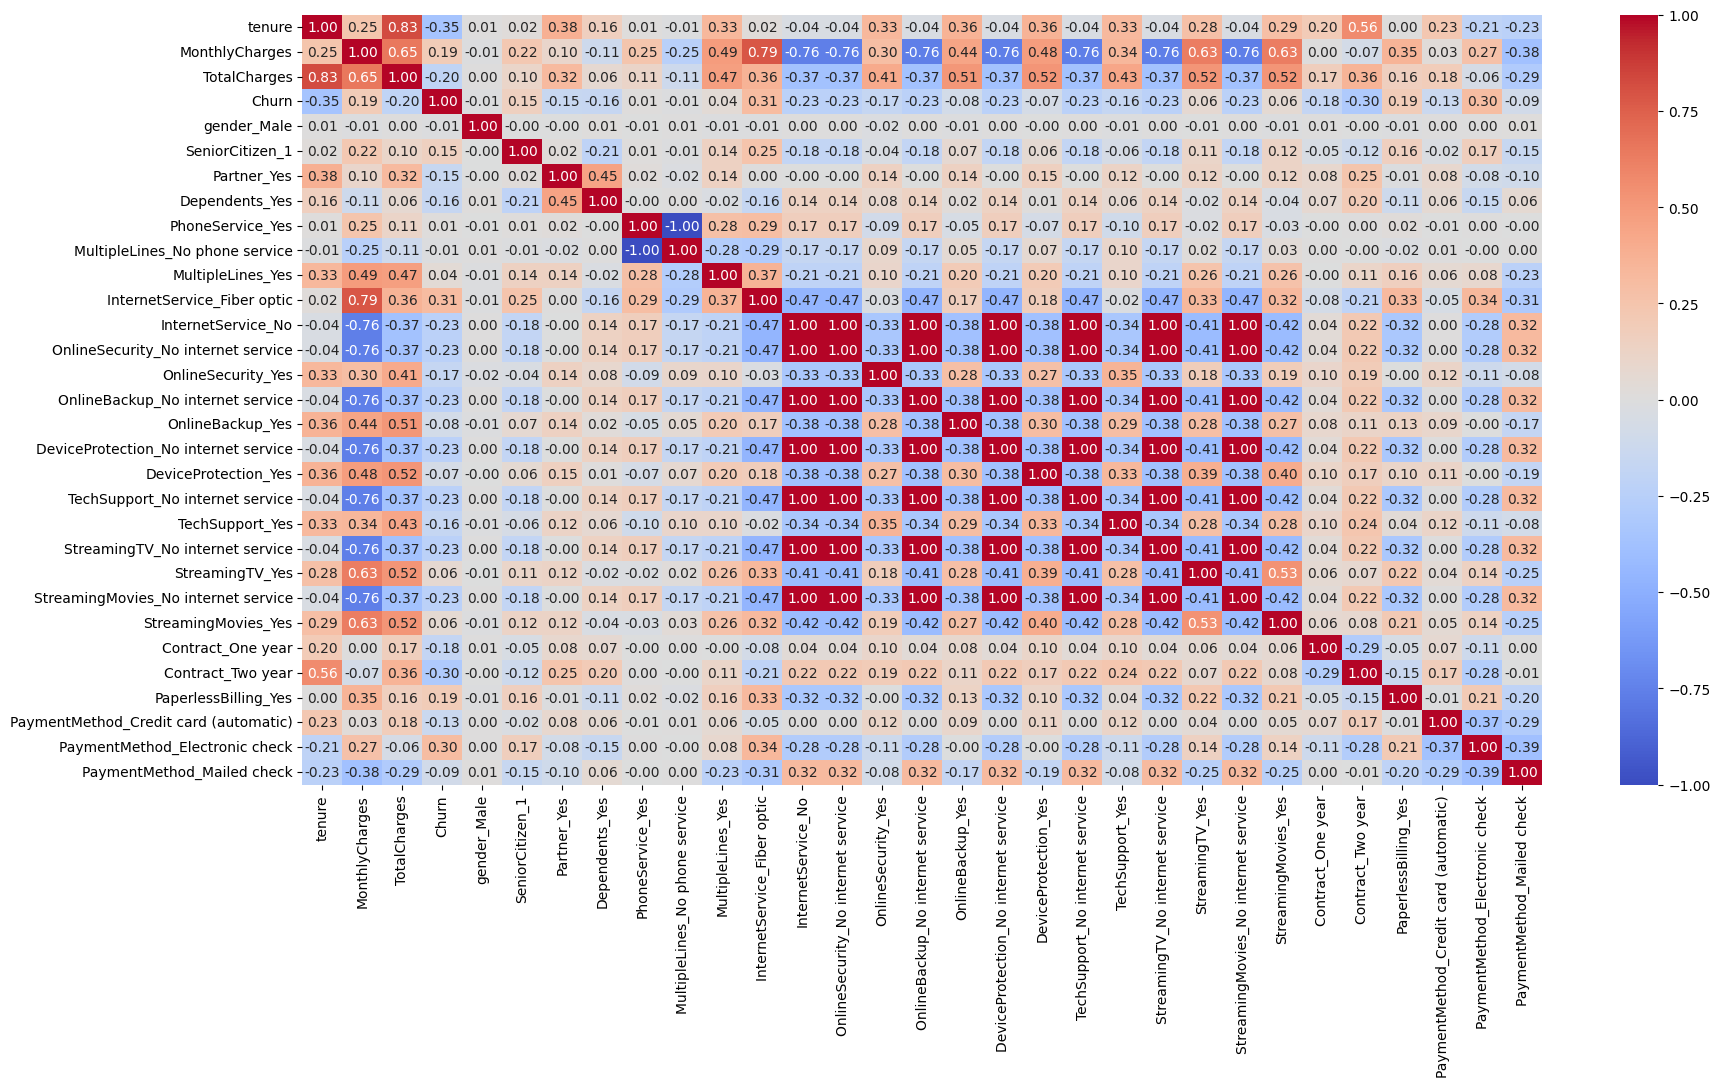

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Nótese cómo muchas de las variables categóricas no binarias contenían en sus valores una categoría que corresponde con una columna que ya existe previamente. Por ejemplo "InternetService_No" reaparece desde "StreamingMovies_No internet service", "StreamingTV_No internet service", "TechSupport_No internet service", "DeviceProtection_No internet service", "OnlineBackup_No internet service", "OnlineSecurity_No internet service", etc.

Todas estas son variables redundantes. Basta con quedarnos únicamente con "InternetService_No" para capturar toda la información que ofrecen.

In [91]:
encoded_first_level = encoded_df[encoded_df.columns[~encoded_df.columns.str.contains("internet", case=False)].tolist() + ["InternetService_No"]]

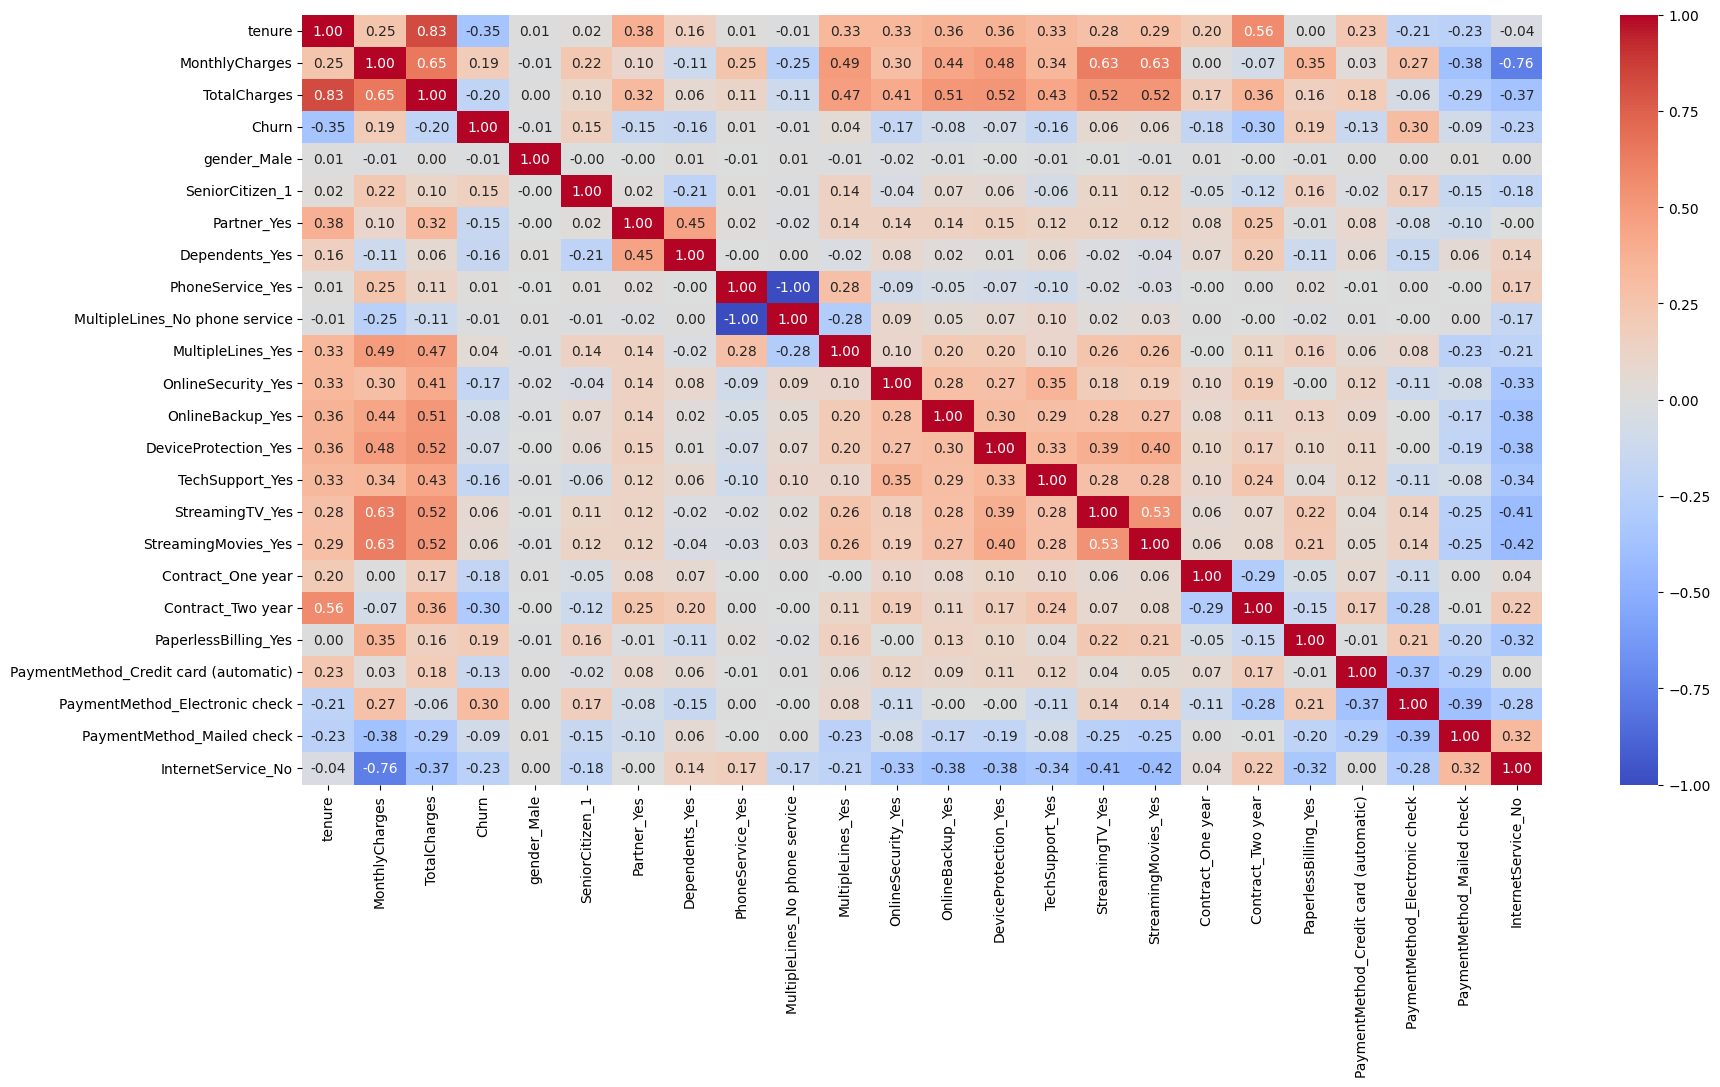

In [94]:
plt.figure(figsize=(20, 10))
sns.heatmap(encoded_first_level.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Otro ejemplo es "MultipleLines_No phone service" con "PhoneService_Yes" y nótese cómo "Monthly charges" puede ser explicado en gran parte como una combinación lineal de los servicios contratados por el usuario. En este caso, aunque la correlación es fuerte, decido no descartar esta variable porque aún contiene un tanto de información que puede ser útil para el modelo.

Lo mismo con TotalCharges = tenure*MonthtlyCharges.

In [95]:
encoded_second_level = encoded_first_level.drop(columns=["MultipleLines_No phone service"])

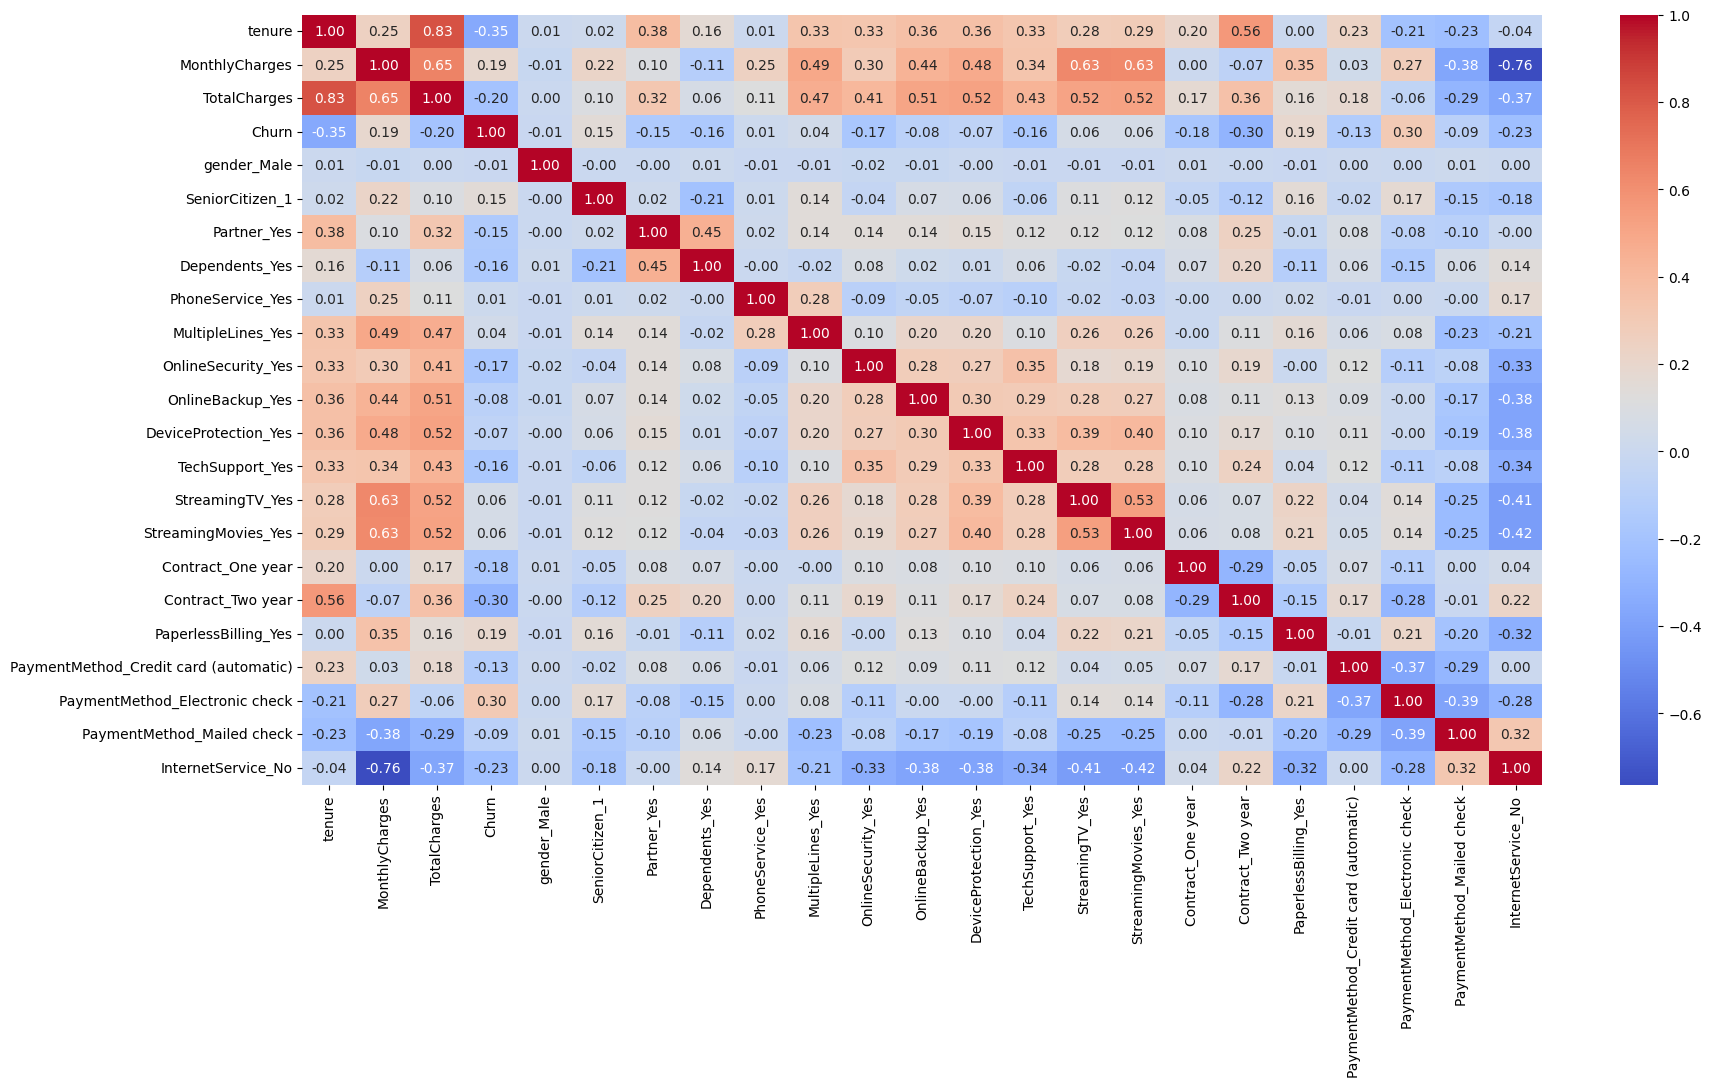

In [97]:
plt.figure(figsize=(20, 10))
sns.heatmap(encoded_second_level.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Por último, descartamos las variables que no tienen una correlación despreciable con nuestro target puesto que no aportan información relevante para el entrenamiento del modelo.

In [114]:
churn_corr = encoded_second_level.corr()['Churn'].drop('Churn').sort_values(ascending=False)

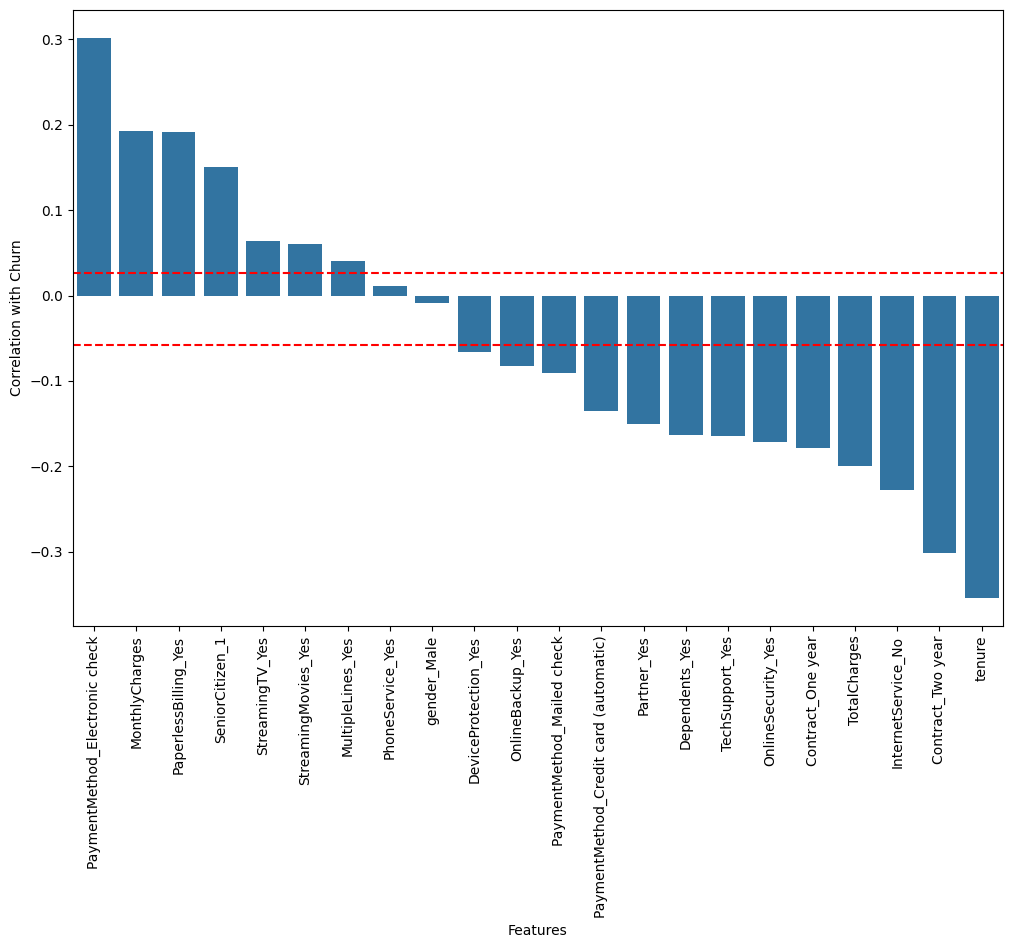

In [123]:
plt.figure(figsize=(12,8))
sns.barplot(x=churn_corr.index, y=churn_corr)
plt.axhline(churn_corr.mean() + 0.5*churn_corr.std(), color='r', linestyle='--')
plt.axhline(churn_corr.mean() - 0.001*churn_corr.std(), color='r', linestyle='--')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90)
plt.show()

In [129]:
clean_data = encoded_second_level.drop(columns=["gender_Male", "PhoneService_Yes"])

In [132]:
clean_data

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_No
0,1,29.85,29.85,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,45,42.30,1840.75,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,0
7039,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,1,1,0,1,1,0,0,0
7040,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,4,74.40,306.60,1,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


### Escalamiento de los datos.

Ya seleccionadas las variables con las que vamos a trabajar, pasamos al escalamiento.

Los algoritmos de machine learning funcionan mejor cuando los valores de entrenamiento están acotados en rangos cercanos a cero como [0,1] o [-1,1].

<Axes: title={'center': 'Tenure'}, ylabel='Frequency'>

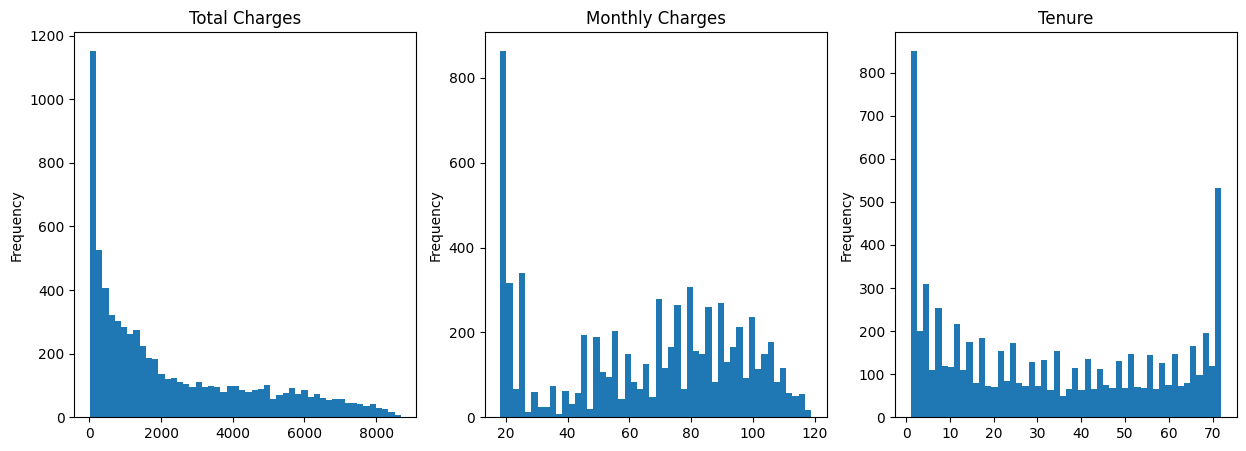

In [136]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

clean_data["TotalCharges"].plot(kind='hist', bins=50, ax=axs[0], title='Total Charges')
clean_data["MonthlyCharges"].plot(kind='hist', bins=50, ax=axs[1], title='Monthly Charges')
clean_data["tenure"].plot(kind='hist', bins=50, ax=axs[2], title='Tenure')

Scalers como MinMax son sensibles a los extremos. En este caso, para las variables que vamos a escalar, parecer ser una buena opción para llevarlas al rango [0,1] dado que no existen outliers ni valores negativos.

In [141]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = pd.DataFrame(
    scaler.fit_transform(clean_data),
    columns=clean_data.columns
)

In [142]:
scaled_data

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_No
0,0.000000,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.464789,0.385075,0.215867,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.014085,0.354229,0.010310,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.619718,0.239303,0.210241,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.323944,0.662189,0.227521,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7028,1.000000,0.845274,0.847461,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7029,0.140845,0.112935,0.037809,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7030,0.042254,0.558706,0.033210,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
